### About

<img src="tokyo.jpg" width="640" height="240" style="margin-left:auto; margin-right:auto"/>

The 2021 Games are the fourth Olympic Games to be held in Japan, following the Tokyo 1964 (Summer), Sapporo 1972 (Winter), and Nagano 1998 (Winter) games.
The 2021 Summer Olympics , officially the Games of the XXXII Olympiad and branded as Tokyo 2021, is an ongoing international multi-sport event being held from 23 July to 8 August 2021 in Tokyo, Japan, with some preliminary events that began on 21 July.
More than 11,000 athletes from 200 countries took part in these Olympic Games.

Data source: [Tokyo 2021 Olympics](https://olympics.com/en/olympic-games/tokyo-2020/medals)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading Data

In [2]:
raw_df = pd.read_csv('Tokyo 2021 dataset v4.csv')
raw_df.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


### Setting Styles

In [3]:
from matplotlib import rcParams

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 12.7, 7.27

### Cleaning the data

In [4]:
# searching for Nan values
raw_df.isna().sum()

Rank             0
Team/NOC         0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank by Total    0
NOCCode          0
Continent        0
dtype: int64

In [5]:
raw_df.columns

Index(['Rank', 'Team/NOC', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Rank by Total', 'NOCCode', 'Continent'],
      dtype='object')

In [6]:
#changing names of the columns
rename = {
    'Team/NOC': 'Team',
    'Gold Medal': 'Gold',
    'Silver Medal': 'Silver',
    'Bronze Medal': 'Bronze',
}
df = raw_df.rename(columns = rename)

In [7]:
df.head()

,Rank,Team,Gold,Silver,Bronze,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


### Data analysis and Visualization

#### Top 10 countries with Gold, Silver and Bronze Medals

In [8]:
# Top 10 with gold
top10_gold = df.groupby('Team')['Gold'].sum().sort_values(ascending= False).head(10)

# Top 10 with Silver
top10_silver = df.groupby('Team')['Silver'].sum().sort_values(ascending= False).head(10)

# Top 10 with Bronze
top10_bronze = df.groupby('Team')['Bronze'].sum().sort_values(ascending = False).head(10)

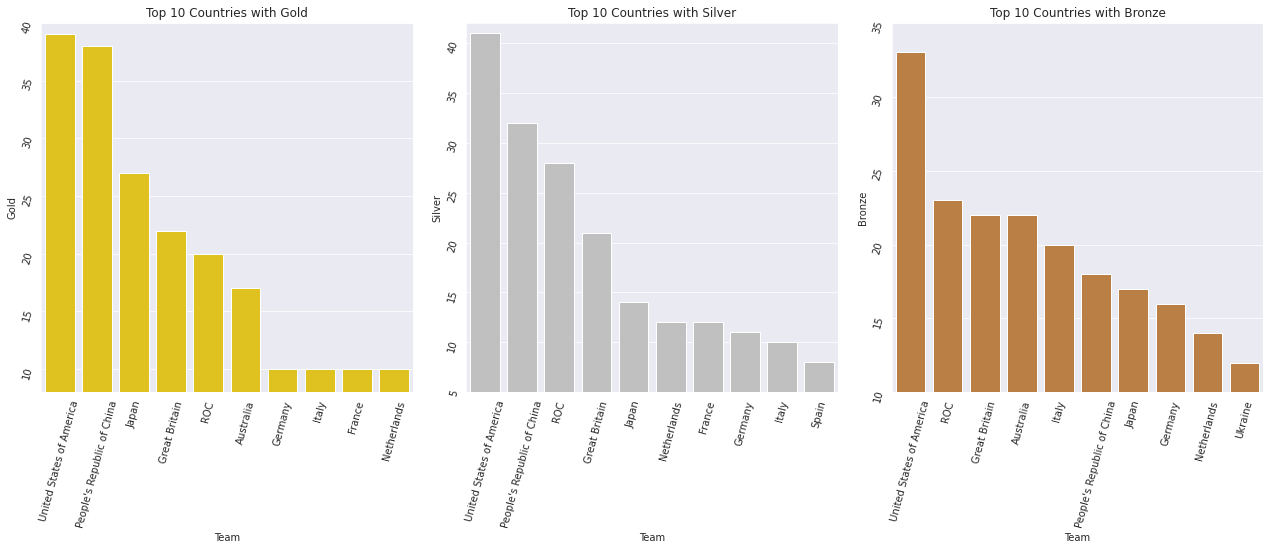

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,8))


ax1.set_title('Top 10 Countries with Gold')
ax1.tick_params(labelrotation = 75)
ax1.set_ylim(8,40)
sns.barplot(x = top10_gold.index, y = top10_gold, ax = ax1, color = '#ffd700');

ax2.set_title('Top 10 Countries with Silver')
ax2.tick_params(labelrotation = 75)
ax2.set_ylim(5,42)
sns.barplot(x = top10_silver.index, y = top10_silver, ax = ax2, color = '#c0c0c0');

ax3.set_title('Top 10 Countries with Bronze')
ax3.tick_params(labelrotation = 75)
ax3.set_ylim(10,35)
sns.barplot(x = top10_bronze.index, y = top10_bronze, ax = ax3, color = '#cd7f32');

plt.tight_layout(pad = 2)

#### Top 10 Countries by Total Medals

In [10]:
top10_total = df[['Team','Total']].sort_values('Total', ascending = False)

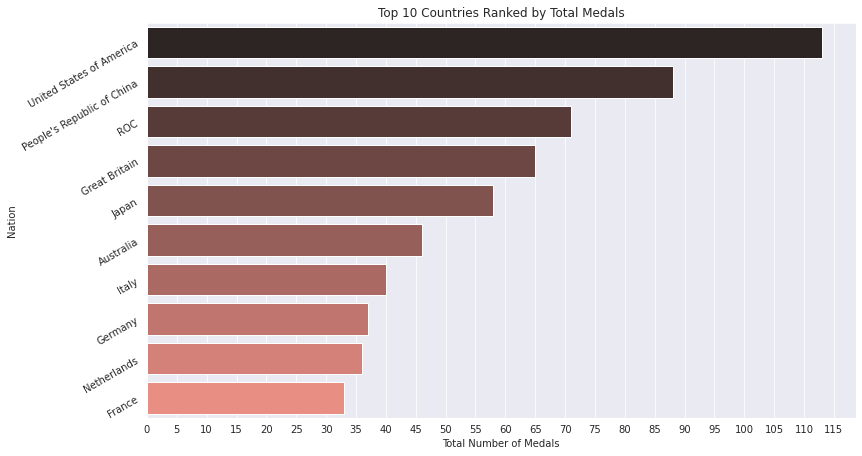

In [11]:
sns.barplot(x = top10_total['Total'] , y =top10_total['Team'].head(10), palette = 'dark:salmon')
plt.title('Top 10 Countries Ranked by Total Medals')
plt.xticks(np.arange(0,120,5))
plt.yticks(rotation = 30)
plt.xlabel('Total Number of Medals')
plt.ylabel('Nation');

#### Amount of Awarded Medals

In [12]:
gold_medals = df['Gold'].sum()
silver_medals = df['Silver'].sum()
bronze_medals = df['Bronze'].sum()

values = [gold_medals, silver_medals, bronze_medals]
labels= ["Gold", "Silver", "Bronze"]
colors = ['#ffd700', '#c0c0c0', '#cd7f32']
explode = (0,0,0.1)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

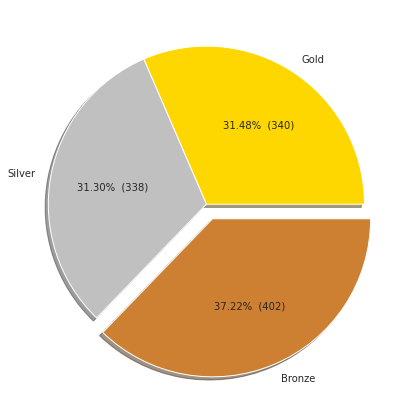

In [13]:
plt.pie(
    values, 
    labels = labels, 
    autopct=make_autopct(values), 
    shadow = True, 
    colors = colors, 
    explode = explode,
);

#### Most Medals by Continent

In [14]:
cont = df.groupby('Continent')[['Gold','Silver','Bronze','Total']].sum().head(10)
cont = cont.sort_values('Total', ascending = False)

##### Stacked

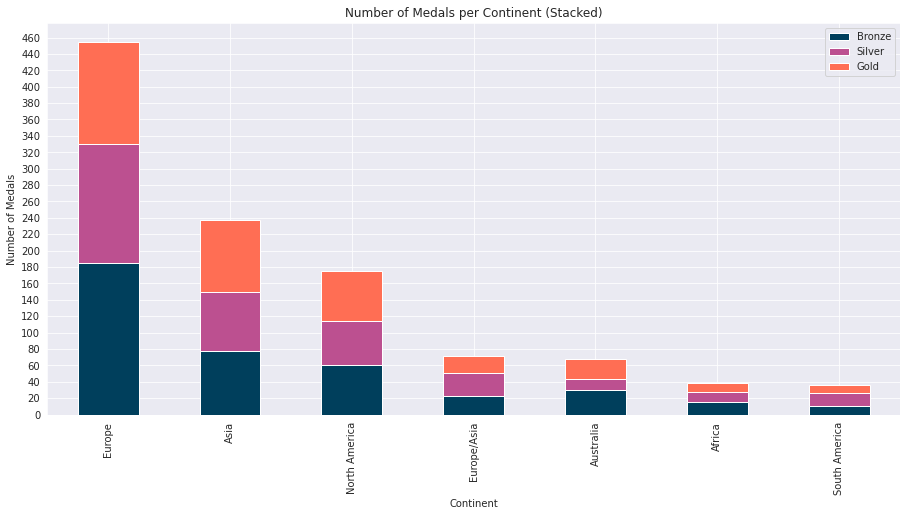

In [15]:
cont[['Bronze', 'Silver','Gold']].plot(kind = 'bar', stacked = True, color = ['#003f5c', '#bc5090', '#ff6e54'])
plt.yticks(np.arange(0, 470, 20))
plt.legend(['Bronze', 'Silver', 'Gold'])
plt.title('Number of Medals per Continent (Stacked)')
plt.ylabel('Number of Medals')
plt.tight_layout();

##### Grouped 

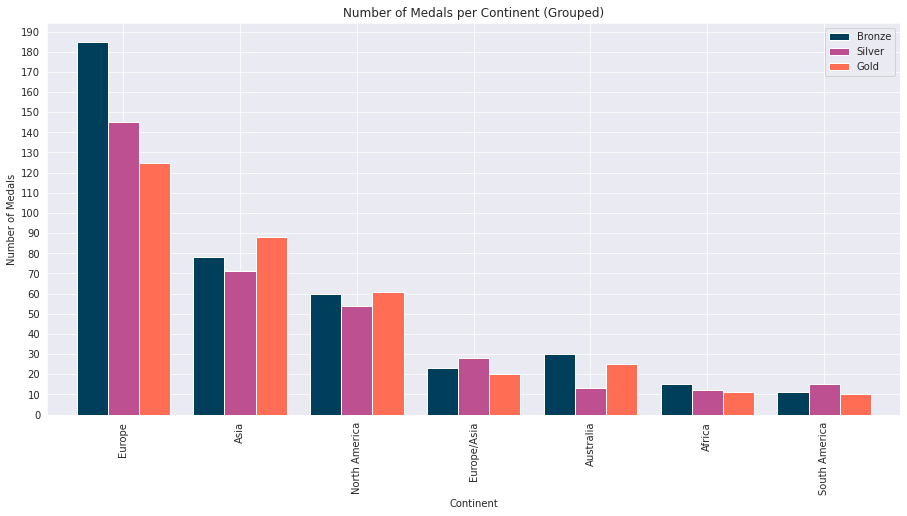

In [16]:
width = 0.8
cont[['Bronze', 'Silver','Gold']].plot(width = width,kind = 'bar', stacked = False, color = ['#003f5c', '#bc5090', '#ff6e54']);
plt.yticks(np.arange(0, 200, 10))
plt.legend(['Bronze', 'Silver', 'Gold'])
plt.title('Number of Medals per Continent (Grouped)')
plt.ylabel('Number of Medals')
plt.tight_layout();

#### Rank vs Rank after Tokyo OL

In [17]:
a = df[['Rank', 'Rank by Total', 'Team']].head(20)

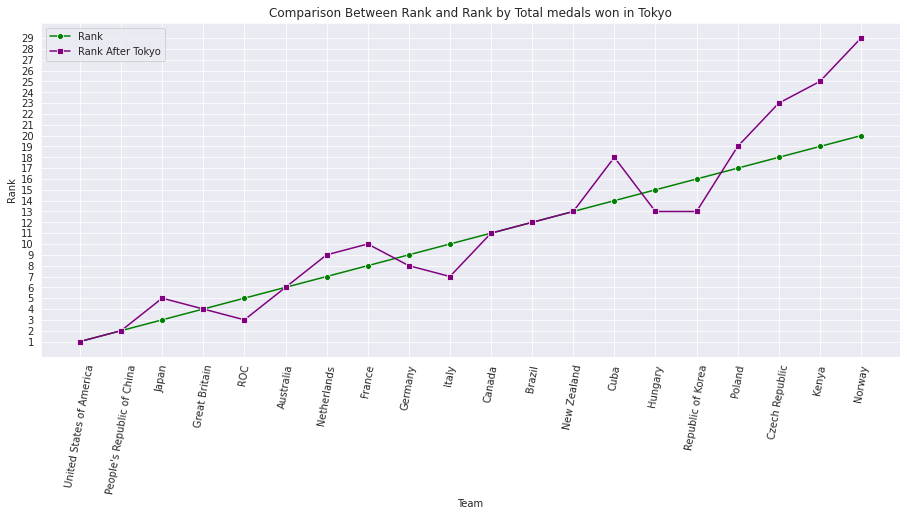

In [18]:
sns.lineplot(data = a, x = 'Team', y = 'Rank',color = 'green', marker = 'o')
sns.lineplot(data = a, x = 'Team', y = 'Rank by Total',color = 'purple', marker = 's')
plt.xticks(rotation = 80)
plt.yticks(np.arange(1,30,1))
plt.title('Comparison Between Rank and Rank by Total medals won in Tokyo')
plt.legend(['Rank', 'Rank After Tokyo'])
plt.tight_layout();